In [39]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import itertools
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objs as go
import math
plt.style.use("seaborn-whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from mlxtend.classifier import StackingCVClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_curve, auc, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import mutual_info_classif
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
from scipy import stats
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")

### Data Fields:
`ID` - an ID for this instance.\
Area - `(A)`, The area of a bean zone and the number of pixels within its boundaries.\
Perimeter - `(P)`, Bean circumference is defined as the length of its border.\
MajorAxisLength - `(L)`, The distance between the ends of the longest line that can be drawn from a bean.\
MinorAxisLength - `(I)`, The longest line that can be drawn from the bean while standing perpendicular to the main axis.\
AspectRatio - `(K)`, Defines the relationship between L and l`(L/I)`.\
Eccentricity - `(Ec)`, Eccentricity of the ellipse having the same moments as the region.\
ConvexArea - `(C)`, Number of pixels in the smallest convex polygon that can contain the area of a bean seed.\
EquivDiameter - `(Ed)`, The diameter of a circle having the same area as a bean seed area `sqrt(4*A/pi)`.\
Extent -`(Ex)`, The ratio of the pixels in the bounding box to the bean area.\
Solidity - `(S)`, Also known as convexity. The ratio of the pixels in the convex shell to those found in beans `(A/c)`.\
Roundness - `(R)`, Calculated with the following formula: `(4*pi*A)/(P^2)`.\
Compactness - `(CO)`, Measures the roundness of an object: `(Ed/L)`.\
ShapeFactor1 - `(SF1=L/A)`.\
ShapeFactor2 - `(SF2=I/A)`.\
ShapeFactor3 - `(SF3=A/(pi*L/2*L/2))`.\
ShapeFactor4 - `(SF4=A/(pi*L/2*I/2))`.\
`y` - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

# Loading and exploring the dataset

In [40]:
raw_data = pd.read_csv('train.csv')
raw_data

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,SEKER
10830,10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,DERMASON
10831,10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,CALI
10832,10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793,SIRA


In [41]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [42]:
# Converting dtype of target from object to categorical for label encoding
raw_data.y = raw_data.y.astype('category')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               10834 non-null  int64   
 1   Area             10834 non-null  int64   
 2   Perimeter        10834 non-null  float64 
 3   MajorAxisLength  10834 non-null  float64 
 4   MinorAxisLength  10834 non-null  float64 
 5   AspectRation     10834 non-null  float64 
 6   Eccentricity     10834 non-null  float64 
 7   ConvexArea       10834 non-null  int64   
 8   EquivDiameter    10834 non-null  float64 
 9   Extent           10834 non-null  float64 
 10  Solidity         10834 non-null  float64 
 11  roundness        10834 non-null  float64 
 12  Compactness      10834 non-null  float64 
 13  ShapeFactor1     10834 non-null  float64 
 14  ShapeFactor2     10834 non-null  float64 
 15  ShapeFactor3     10834 non-null  float64 
 16  ShapeFactor4     10834 non-null  float64

In [43]:
raw_data.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

In [44]:
raw_data.isnull().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

In [45]:
raw_data.duplicated().sum()

0

In [46]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10834.0,5416.500000,3127.650742,0.000000,2708.250000,5416.500000,8124.750000,10833.000000
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195


In [47]:
raw_data['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

## Data visualization

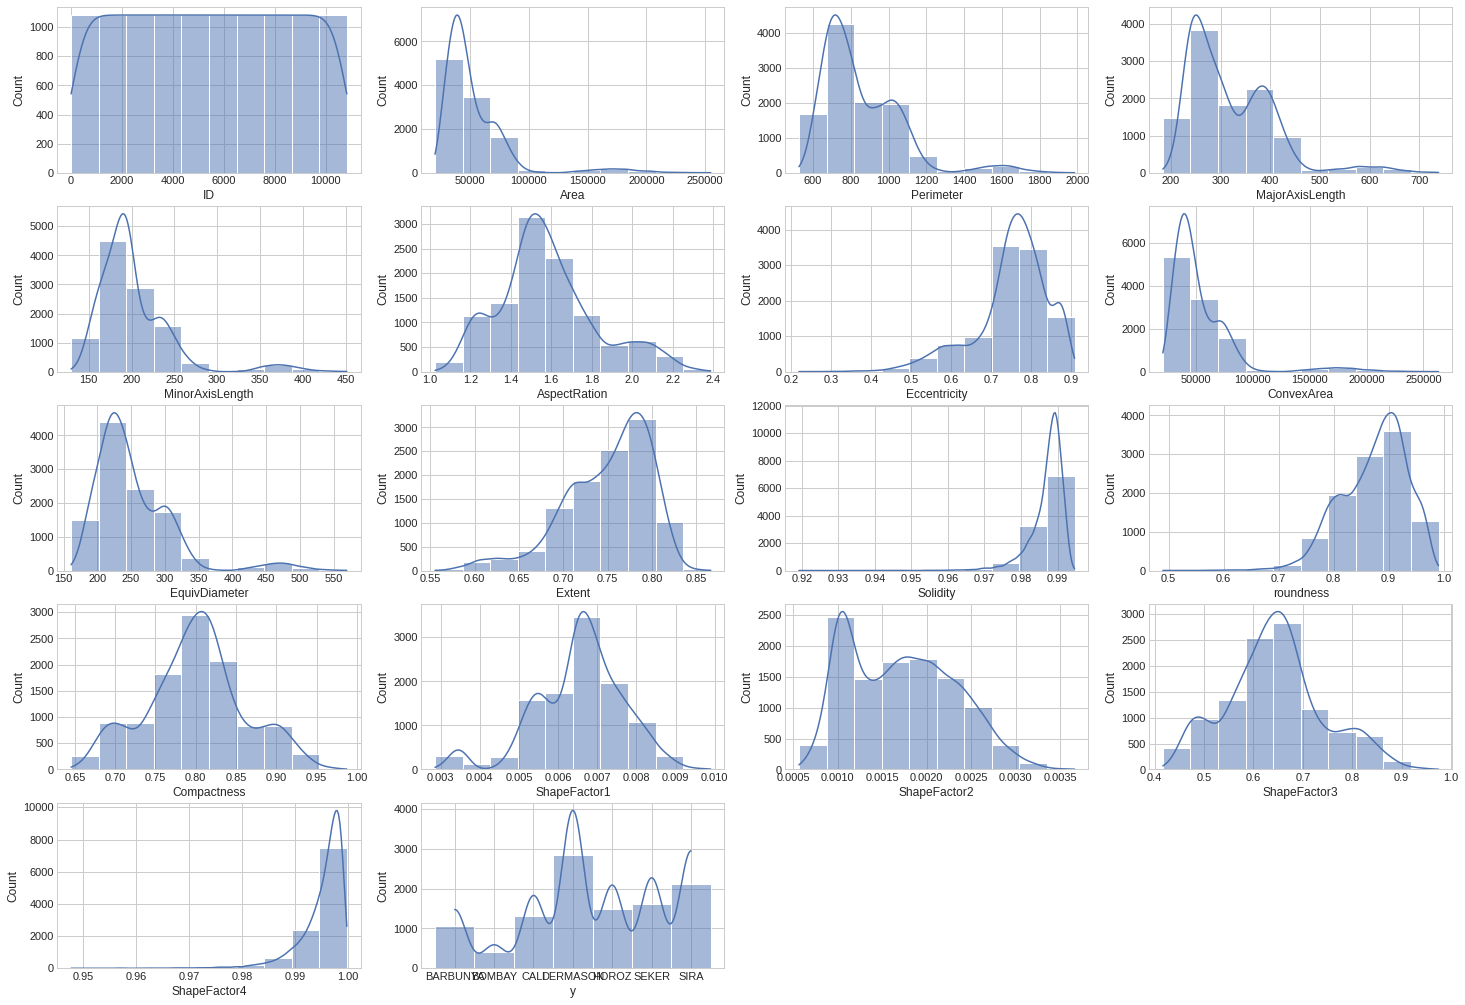

In [48]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(list(raw_data.columns)):
    plt.subplot(7, 4, i+1)
    sns.histplot(raw_data[col], kde=True, bins=10)

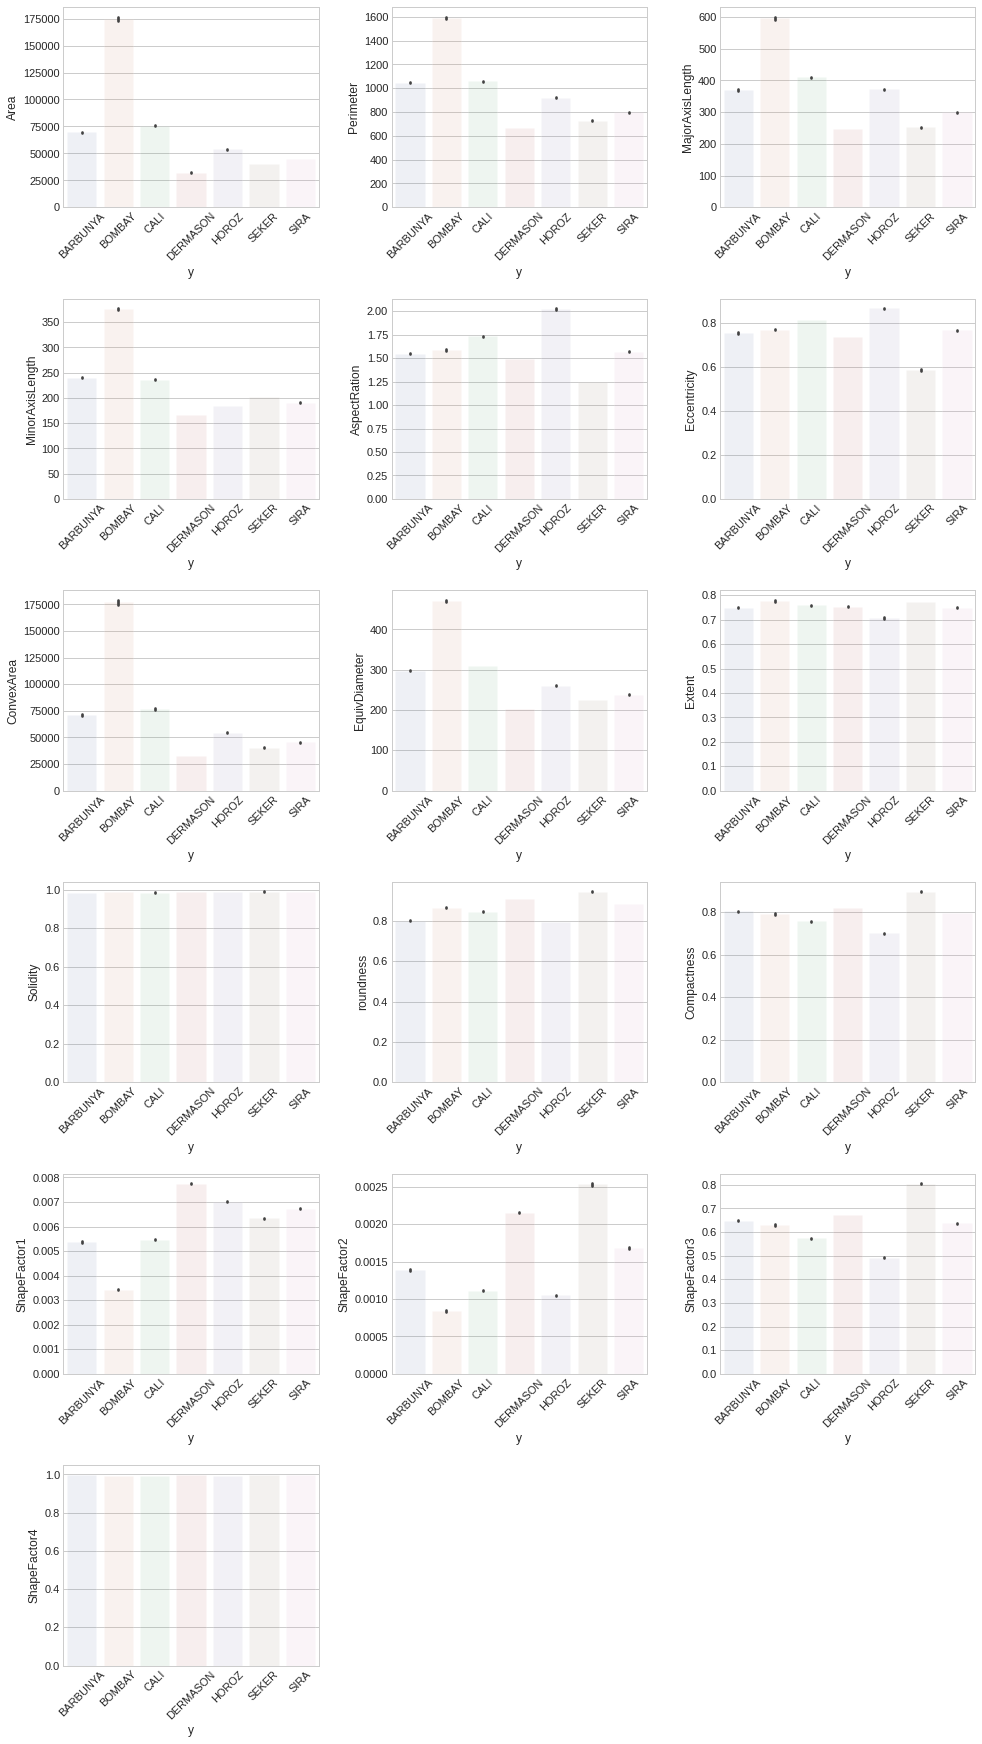

In [49]:
def plot_subplots(subplots, plot, n=3):
    m = len(subplots)
    height = (m//n + (m%n != 0)) * 4
    plt.figure(figsize=(14, height))
    for i, c in enumerate(subplots):
        plt.subplot(m//n + min(1, m%n), n, i+1)
        plot(c)
        plt.tight_layout(pad=2.0)
        plt.xticks(rotation=45)
        
num_cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
           'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
           'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
           'ShapeFactor3', 'ShapeFactor4']

plot_subplots(num_cols, lambda c: sns.barplot(data=raw_data, x='y', alpha=0.1, y=c))

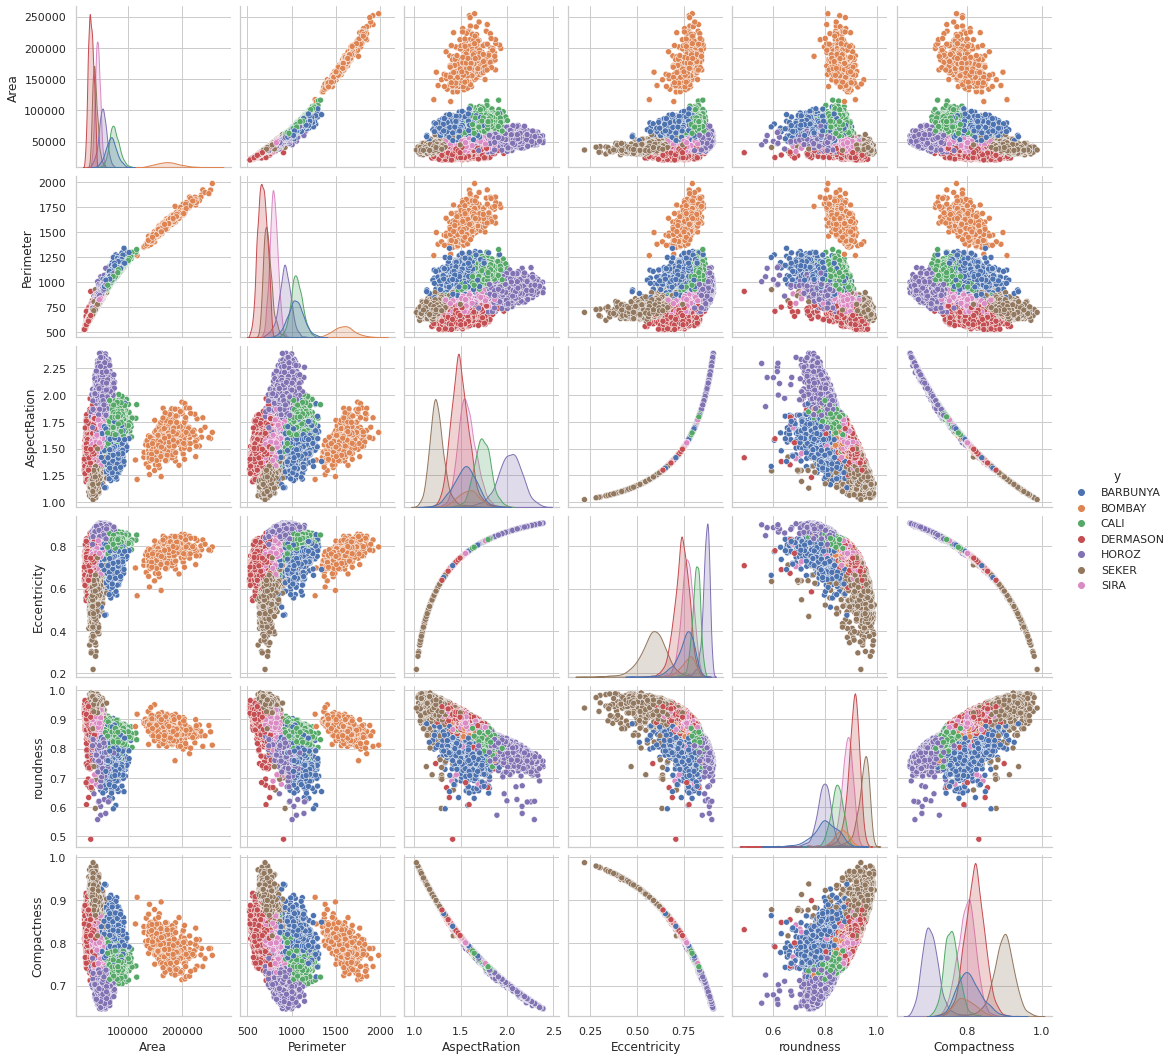

In [50]:
Strongly_corr_features = raw_data[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","y"]]
Strongly_corr_features.head()
sns.set_theme(style="whitegrid")
sns.pairplot(Strongly_corr_features, hue="y")

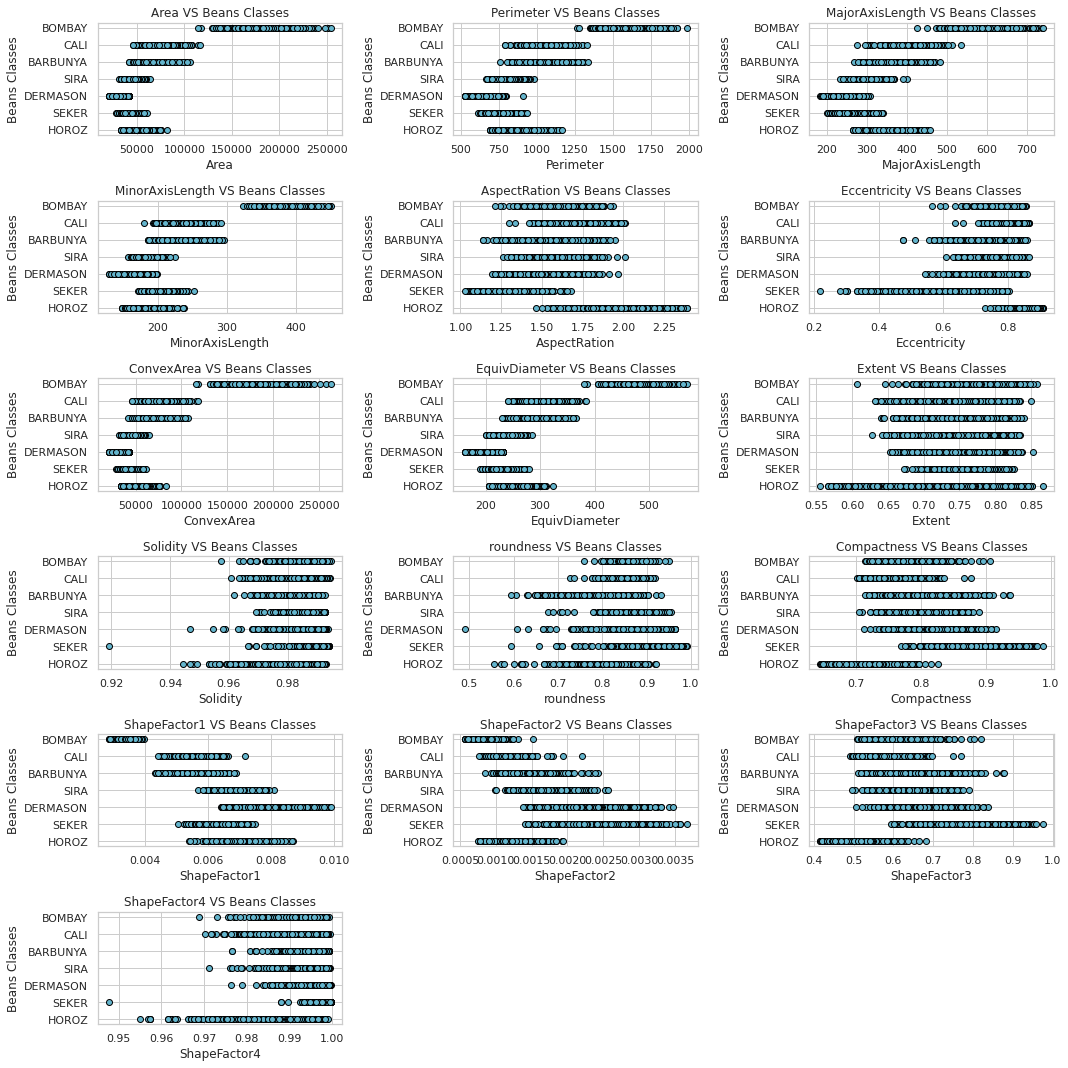

In [51]:
visualization_df=raw_data.drop(['ID'], axis=1)
i = 1
plt.figure(figsize = [15, 15], tight_layout = 5)
for column in visualization_df.drop(['y'], axis=1).columns:
    plt.subplot(6, 3, i)
    plt.scatter(data = visualization_df, x = column, y = 'y', c='c', edgecolors='black')
    plt.xlabel(column)
    plt.ylabel('Beans Classes')
    plt.title(column + ' VS ' + 'Beans Classes')
    i += 1
plt.show()

In [52]:
raw_data.y.mode()

0    DERMASON
Name: y, dtype: category
Categories (7, object): ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

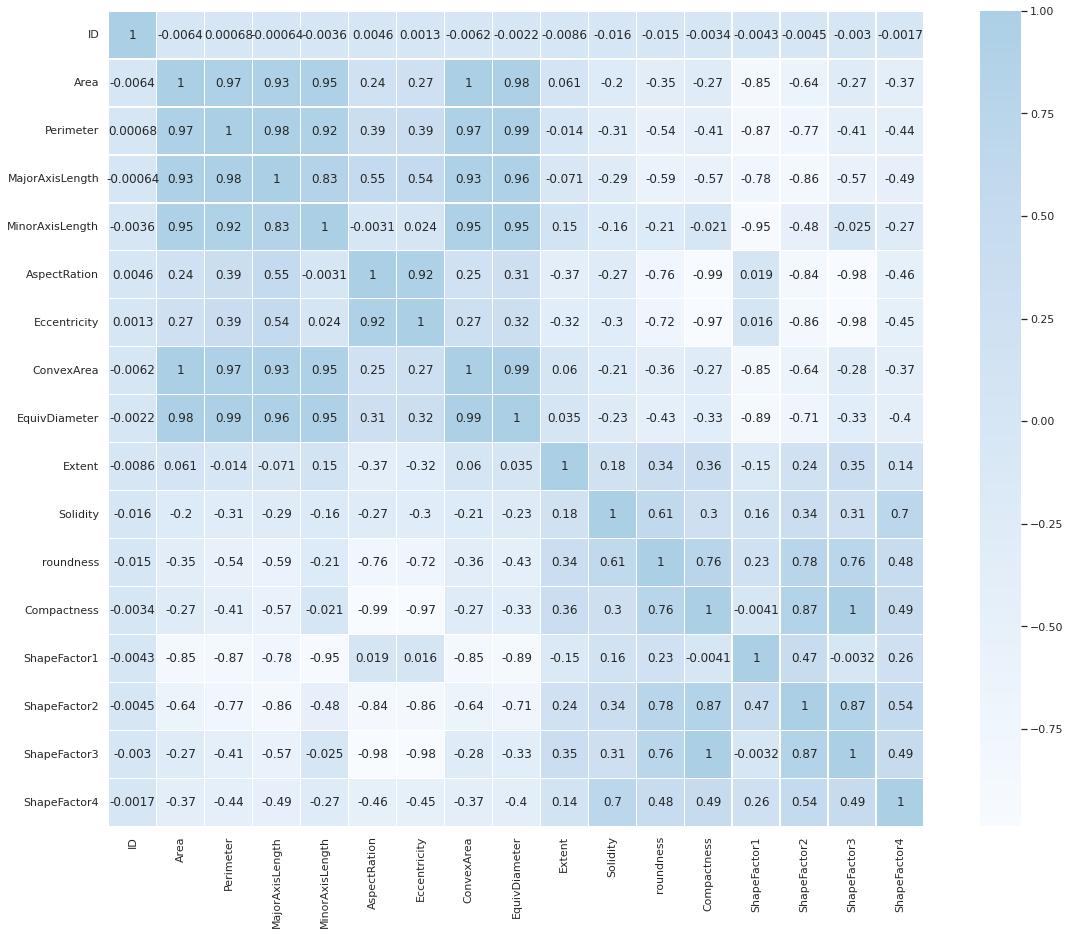

In [53]:
corr = raw_data.corr()
f,axes = plt.subplots(1,1,figsize = (20,15))
sns.heatmap(corr, square=True, annot = True, linewidth = .5, center = 2, ax = axes, cmap='Blues')

## Feature Engineering:

In [54]:
data = raw_data.copy()
data.head(10)

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
5,5,34771,683.109,230.586519,192.185558,1.199812,0.552574,35163,210.408679,0.783978,0.988852,0.936369,0.912493,0.006632,0.002836,0.832644,0.999016,SEKER
6,6,45817,862.123,333.458920,175.910473,1.895617,0.849535,46654,241.528500,0.757932,0.982059,0.774637,0.724313,0.007278,0.001236,0.524629,0.994495,HOROZ
7,7,38449,746.242,284.788951,172.925734,1.646886,0.794544,38944,221.257287,0.804878,0.987289,0.867632,0.776917,0.007407,0.001665,0.603600,0.994060,SIRA
8,8,38396,709.443,250.380456,195.738890,1.279155,0.623572,38723,221.104739,0.748431,0.991555,0.958652,0.883075,0.006521,0.002446,0.779822,0.997513,SEKER
9,9,44492,785.831,297.953914,190.455857,1.564425,0.769030,44870,238.010449,0.772431,0.991576,0.905385,0.798816,0.006697,0.001682,0.638108,0.998271,SIRA


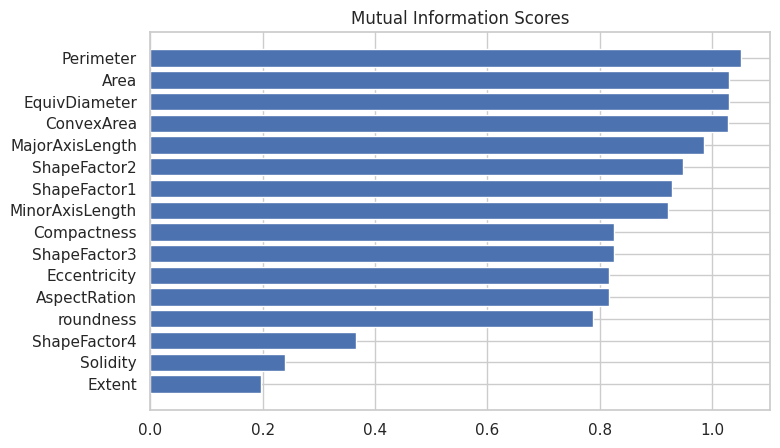

In [55]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# Label encoding for categoricals
for colname in data.select_dtypes("object"):
    data[colname], _ = data[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = data.dtypes == int

mi_scores = make_mi_scores(data.drop(columns=['ID', 'y']), data.y, discrete_features=False)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [56]:
#Calc the skeweness of each continous feature

def calc_skew(df):
    print("\nIF THE DATA IS HIGHLY SKEWED IF SKWENESS  > 1 OR < -1 \n")
    for col in df.loc[:, df.dtypes != np.object ]:
        print("the skewness of ",col,"is :",df[col].skew())

calc_skew(data.drop(['ID','y'], axis=1))


IF THE DATA IS HIGHLY SKEWED IF SKWENESS  > 1 OR < -1 

the skewness of  Area is : 2.970246388927051
the skewness of  Perimeter is : 1.6507728935042203
the skewness of  MajorAxisLength is : 1.390286181991597
the skewness of  MinorAxisLength is : 2.2514676417086124
the skewness of  AspectRation is : 0.5891859940995572
the skewness of  Eccentricity is : -1.075626219703884
the skewness of  ConvexArea is : 2.96031471532564
the skewness of  EquivDiameter is : 1.9713782398467592
the skewness of  Extent is : -0.9008918490407785
the skewness of  Solidity is : -2.5076344040493823
the skewness of  roundness is : -0.6595656889519825
the skewness of  Compactness is : 0.03824198097639844
the skewness of  ShapeFactor1 is : -0.5448725106105298
the skewness of  ShapeFactor2 is : 0.2926774098978501
the skewness of  ShapeFactor3 is : 0.24558855924400386
the skewness of  ShapeFactor4 is : -2.628539782125935


## Data Preparation

In [57]:
def normalize_data(df,column):
    return StandardScaler().fit_transform(np.array(df[column]).reshape(-1,1))

def removeOutliers(df,outliersColomns):
    z_scores = stats. zscore(df[outliersColomns]) 
    abs_z_scores = np. abs(z_scores)
    filtered_entries = (abs_z_scores < 3). all(axis=1)
    new_df = df[filtered_entries]
    return new_df

y_labels = ['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']
def removeOutliers_cat(df_raw,outliersColomns):
    df = df_raw.copy()
    for cat_ in y_labels:
        df_ = df[df['y']==cat_]
        z_scores = stats. zscore(df_[outliersColomns]) 
        abs_z_scores = np. abs(z_scores)
        filtered_entries = (abs_z_scores < 4). all(axis=1)
        df_ = df_[filtered_entries]
        df = df[df['y']!=cat_]
        df = df.append(df_)
    return df

# Transform data
def transformation(df,columns,func):
    for col in columns:
        df[col]=func(df[col])
    return df

def encodingTarget(dataset, cols):
    for col_name in cols:
        dataset[col_name] = dataset[col_name].replace({'DERMASON' :0, 'SIRA':1, 'SEKER':2, 'HOROZ':3, 'CALI':4, 'BARBUNYA':5, 'BOMBAY':6})
    return dataset

def decodingTarget(dataset, cols):
    for col_name in cols:
        dataset[col_name] = dataset[col_name].replace({0:'DERMASON' ,1: 'SIRA', 2:'SEKER', 3:'HOROZ', 4:'CALI',5: 'BARBUNYA', 6:'BOMBAY'})
    return dataset

In [58]:
data = raw_data.copy()

def prepare_data(df, isTest=False):
    
    outliersColomns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
                       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
                       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
                       'ShapeFactor3', 'ShapeFactor4']
    if isTest == False:
#         pass

        before_ = len(df)
        df = removeOutliers_cat(df,outliersColomns)
        print('Removed ',before_ - len(df),' outliers')
#         df = encodingTarget(df,['y'])
        
    # take log1p for right skewed and square for left skewedfeatures.
    right_skew_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'EquivDiameter', 'ConvexArea']
    left_skew_features = ['Eccentricity', 'Solidity', 'roundness', 'ShapeFactor4', 'Extent']
    transformation(data, right_skew_features, np.log1p)
    transformation(data, left_skew_features, np.square)
    
    df['ShapeFactor5'] = df['MajorAxisLength'] / df['Perimeter']
    df['ShapeFactor6'] = df['MinorAxisLength'] / df['Perimeter']
    df['ShapeFactor7'] = df['Eccentricity'] * df['Area']
    df['ShapeFactor8'] = df['Eccentricity'] * df['Perimeter']
    df['ShapeFactor9'] = df['Extent'] * df['Area']
    df['ShapeFactor10'] = df['Extent'] * df['Perimeter']
    # pi/6 = 0.52359877559
    df['Volume'] = 0.52359877559 * (df['EquivDiameter'] ** 3)
    df['Spherecity'] = 100 * (df['EquivDiameter'] / df['MajorAxisLength'])
    
    NonScaledFeatures=['ID', 'y','Index']
    for col_name in df.columns:
        if col_name not in NonScaledFeatures:
            scaled_col = col_name + '_r'
            df[col_name] = df[col_name].fillna(df[col_name].mean())  
            df[scaled_col]= df[col_name]
            df[col_name]=normalize_data(df,col_name)

    return df
  
data = prepare_data(data)
# labelencoder
labelencoder = LabelEncoder()
data['y'] = labelencoder.fit_transform(data['y'])
        

Removed  222  outliers


In [59]:
data.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y,ShapeFactor5,ShapeFactor6,ShapeFactor7,ShapeFactor8,ShapeFactor9,ShapeFactor10,Volume,Spherecity,Area_r,Perimeter_r,MajorAxisLength_r,MinorAxisLength_r,AspectRation_r,Eccentricity_r,ConvexArea_r,EquivDiameter_r,Extent_r,Solidity_r,roundness_r,Compactness_r,ShapeFactor1_r,ShapeFactor2_r,ShapeFactor3_r,ShapeFactor4_r,ShapeFactor5_r,ShapeFactor6_r,ShapeFactor7_r,ShapeFactor8_r,ShapeFactor9_r,ShapeFactor10_r,Volume_r,Spherecity_r
count,10612.000000,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,10612.000000,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,1.061200e+04,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,10612.000000,1.061200e+04,10612.000000
mean,5415.620335,1.287658e-16,4.916283e-16,-9.153377e-16,-2.179184e-15,-1.041239e-15,2.822218e-16,9.114458e-17,-4.659338e-16,-1.575780e-15,4.024799e-15,-8.621072e-16,2.139230e-15,3.632392e-16,-6.998213e-16,6.057735e-16,-2.541503e-14,3.526574,-4.038139e-16,1.818921e-15,-1.392361e-15,-1.105578e-15,1.294102e-15,8.816502e-16,9.044154e-16,3.718651e-16,53166.751508,855.107214,320.231652,202.510367,1.581326,0.750729,53875.980023,253.286916,0.750207,0.987381,0.875040,0.800271,0.006555,0.001717,0.644164,0.995237,0.373304,0.239722,40645.406800,649.682510,39977.156026,641.386839,1.013387e+07,80.027104
std,3128.471356,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.836537,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,29595.266529,215.213961,86.048697,45.114248,0.243936,0.091047,30046.509546,59.498590,0.048942,0.004038,0.057599,0.061076,0.001125,0.000593,0.098006,0.003888,0.020344,0.024449,24379.686226,205.488874,23198.880660,170.366794,1.024249e+07,6.107555
min,0.000000,-1.105051e+00,-1.532009e+00,-1.559103e+00,-1.616731e+00,-2.181595e+00,-4.922448e+00,-1.101810e+00,-1.544135e+00,-3.982318e+00,-6.041896e+00,-4.262822e+00,-2.536378e+00,-3.289580e+00,-1.944474e+00,-2.323062e+00,-7.100479e+00,0.000000,-3.206918e+00,-2.720435e+00,-1.254723e+00,-2.186515e+00,-1.072790e+00,-1.511027e+00,-7.744288e-01,-2.536378e+00,20464.000000,525.413000,186.079149,129.576207,1.049180,0.302576,20772.000000,161.417391,0.555315,0.962983,0.629518,0.645368,0.002856,0.000564,0.416499,0.967631,0.308066,0.173214,10057.104885,200.399221,15090.808731,383.970102,2.202164e+06,64.536766
25%,2708.750000,-5.670262e-01,-7.054415e-01,-7.755697e-01,-5.858479e-01,-6.068645e-01,-3.770951e-01,-5.692603e-01,-6.394832e-01,-6.347508e-01,-3.886832e-01,-6.865589e-01,-6.009745e-01,-5.990866e-01,-9.401660e-01,-6.237402e-01,-3.705604e-01,2.000000,-6.194005e-01,-6.307296e-01,-6.586841e-01,-7.859190e-01,-5.370628e-01,-6.385443e-01,-4.796596e-01,-6.009745e-01,36386.250000,703.293500,253.498038,176.081524,1.433296,0.716397,36772.500000,215.240360,0.719143,0.985812,0.835496,0.763568,0.005881,0.001159,0.583036,0.993796,0.360704,0.224303,24587.652962,488.192519,27518.486689,532.605218,5.221193e+06,76.356792
50%,5409.500000,-2.878553e-01,-2.874936e-01,-2.762846e-01,-2.213446e-01,-1.277250e-01,1.469324e-01,-2.906125e-01,-2.497584e-01,2.084381e-01,2.366977e-01,1.623097e-01,2.049204e-02,7.730007e-02,-3.027882e-02,-1.760398e-02,3.077933e-01,3.000000,2.261743e-02,2.205821e-02,-2.882709e-01,-2.160597e-01,-2.954229e-01,-3.130807e-01

In [60]:
data

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y,ShapeFactor5,ShapeFactor6,ShapeFactor7,ShapeFactor8,ShapeFactor9,ShapeFactor10,Volume,Spherecity,Area_r,Perimeter_r,MajorAxisLength_r,MinorAxisLength_r,AspectRation_r,Eccentricity_r,ConvexArea_r,EquivDiameter_r,Extent_r,Solidity_r,roundness_r,Compactness_r,ShapeFactor1_r,ShapeFactor2_r,ShapeFactor3_r,ShapeFactor4_r,ShapeFactor5_r,ShapeFactor6_r,ShapeFactor7_r,ShapeFactor8_r,ShapeFactor9_r,ShapeFactor10_r,Volume_r,Spherecity_r
2,2,-0.726662,-0.935505,-0.933576,-0.755647,-0.643267,-0.423903,-0.726973,-0.882502,1.046195,0.249091,0.969046,0.600266,0.909079,0.972596,0.574374,0.643257,3,-0.312601,0.731696,-0.742365,-0.895955,-0.629500,-0.689371,-0.575646,0.600266,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,0.366945,0.257611,22547.645337,465.582314,25374.158246,523.946475,4.238101e+06,83.693087
3,3,-0.486207,-0.562663,-0.601843,-0.408946,-0.503717,-0.250474,-0.488199,-0.522474,0.325492,0.408940,0.510451,0.449664,0.327170,0.485639,0.418142,1.032316,3,-0.372788,0.451425,-0.509379,-0.561472,-0.442625,-0.463888,-0.428579,0.449664,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,0.365721,0.250759,28227.487084,534.311725,29709.242003,562.359529,5.744363e+06,82.773319
14,14,-0.907105,-1.194092,-1.185411,-1.081025,-0.663552,-0.450494,-0.906803,-1.180219,0.430445,0.251479,0.859667,0.631973,1.543982,1.376455,0.607487,0.936573,3,-0.415240,0.708260,-0.900968,-1.095867,-0.848172,-1.056960,-0.675783,0.631973,26322,598.134,218.233402,153.743022,1.419469,0.709715,26631,183.068870,0.771273,0.988397,0.924553,0.838867,0.008291,0.002533,0.703698,0.998878,0.364857,0.257038,18681.116885,424.504641,20301.444093,461.324518,3.212493e+06,83.886733
19,19,-0.569231,-0.628038,-0.533530,-0.740429,0.167502,0.402696,-0.568911,-0.642728,1.032305,0.014464,0.095948,-0.267790,0.887549,0.072065,-0.302431,0.420676,3,0.379863,-0.197736,-0.494146,-0.402956,-0.469611,-0.380974,-0.481030,-0.267790,36321,719.951,274.324268,169.108035,1.622184,0.787392,36783,215.047282,0.800728,0.987440,0.880566,0.783916,0.007553,0.001759,0.614525,0.996872,0.381032,0.234888,28598.852323,566.883410,29083.224008,576.484574,5.207155e+06,78.391636
20,20,-0.672834,-0.816483,-0.702418,-0.861897,0.026122,0.285508,-0.674685,-0.798648,-0.302464,0.545641,0.526371,-0.134475,1.118197,0.303554,-0.171500,0.209754,3,0.446462,0.045857,-0.607727,-0.593635,-0.669084,-0.832097,-0.544028,-0.134475,33255,679.397,259.792366,163.628383,1.587697,0.776723,33605,205.770700,0.735405,0.989585,0.905356,0.792058,0.007812,0.001897,0.627356,0.996052,0.382387,0.240844,25829.907812,527.702958,24455.882906,499.631739,4.561936e+06,79.205830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10596,10596,4.121706,3.391370,3.270899,3.778636,0.130623,0.373002,4.094280,3.679960,1.466861,0.681881,0.019259,-0.252382,-2.774138,-1.539676,-0.287367,-0.388654,1,0.310426,-0.179977,3.970215,2.890821,4.482765,3.882556,4.394142,-0.252382,175144,1584.943,601.674950,372.972648,1.613188,0.784688,176889,472.229041,0.821994,0.990135,0.876149,0.784857,0.003435,0.000804,0.616001,0.993726,0.379619,0.235322,137433.437726,1243.686139,143967.394759,1302.814339,5.513872e+07,78.485741
10628,10628,4.385139,3.630176,3.533818,3.855095,0.316408,0.516768,4.378686,3.854687,0.868056,-0.205774,-0.286004,-0.445423,-2.794355,-1.627821,-0.474784,-1.043646,1,0.403955,-0.396063,4.319370,3.191311,4.527907,3.849044,4.757564,-0.445423,182940,1636.335,624.297759,376.421904,1.658505,0.797777,185434,482.624536,0.792689,0.986550,0.858567,0.773068

In [61]:
data.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y', 'ShapeFactor5', 'ShapeFactor6',
       'ShapeFactor7', 'ShapeFactor8', 'ShapeFactor9', 'ShapeFactor10',
       'Volume', 'Spherecity', 'Area_r', 'Perimeter_r', 'MajorAxisLength_r',
       'MinorAxisLength_r', 'AspectRation_r', 'Eccentricity_r', 'ConvexArea_r',
       'EquivDiameter_r', 'Extent_r', 'Solidity_r', 'roundness_r',
       'Compactness_r', 'ShapeFactor1_r', 'ShapeFactor2_r', 'ShapeFactor3_r',
       'ShapeFactor4_r', 'ShapeFactor5_r', 'ShapeFactor6_r', 'ShapeFactor7_r',
       'ShapeFactor8_r', 'ShapeFactor9_r', 'ShapeFactor10_r', 'Volume_r',
       'Spherecity_r'],
      dtype='object')

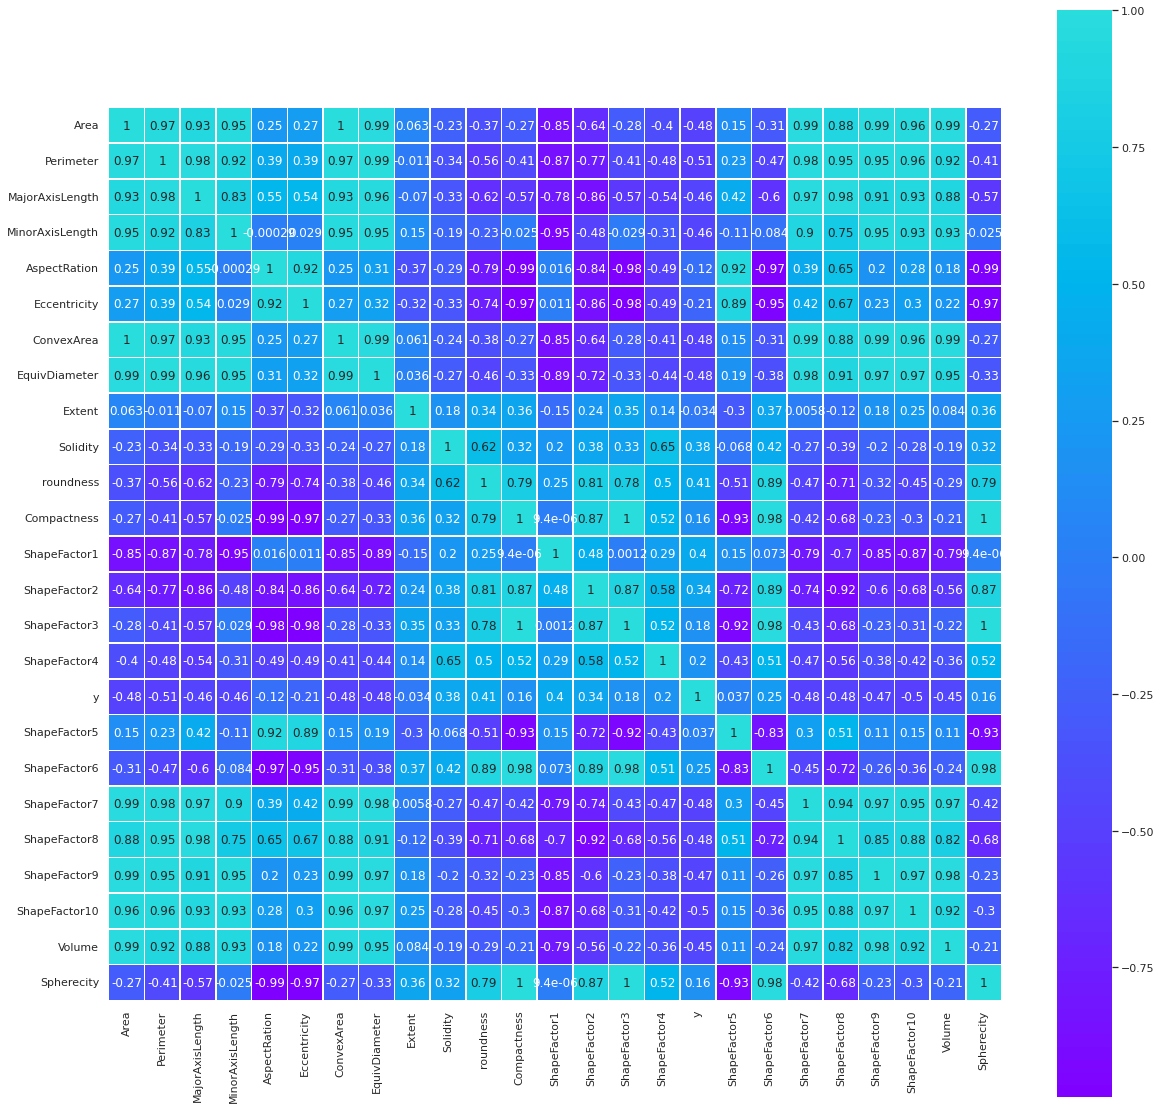

In [62]:
data2 = data[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y', 'ShapeFactor5', 'ShapeFactor6',
       'ShapeFactor7', 'ShapeFactor8', 'ShapeFactor9', 'ShapeFactor10',
       'Volume', 'Spherecity']]
corr2 = data2.corr()
f,axes = plt.subplots(1,1,figsize = (20,20))
sns.heatmap(corr2, square=True, annot = True, linewidth = .5, center = 2, ax = axes, cmap='rainbow')

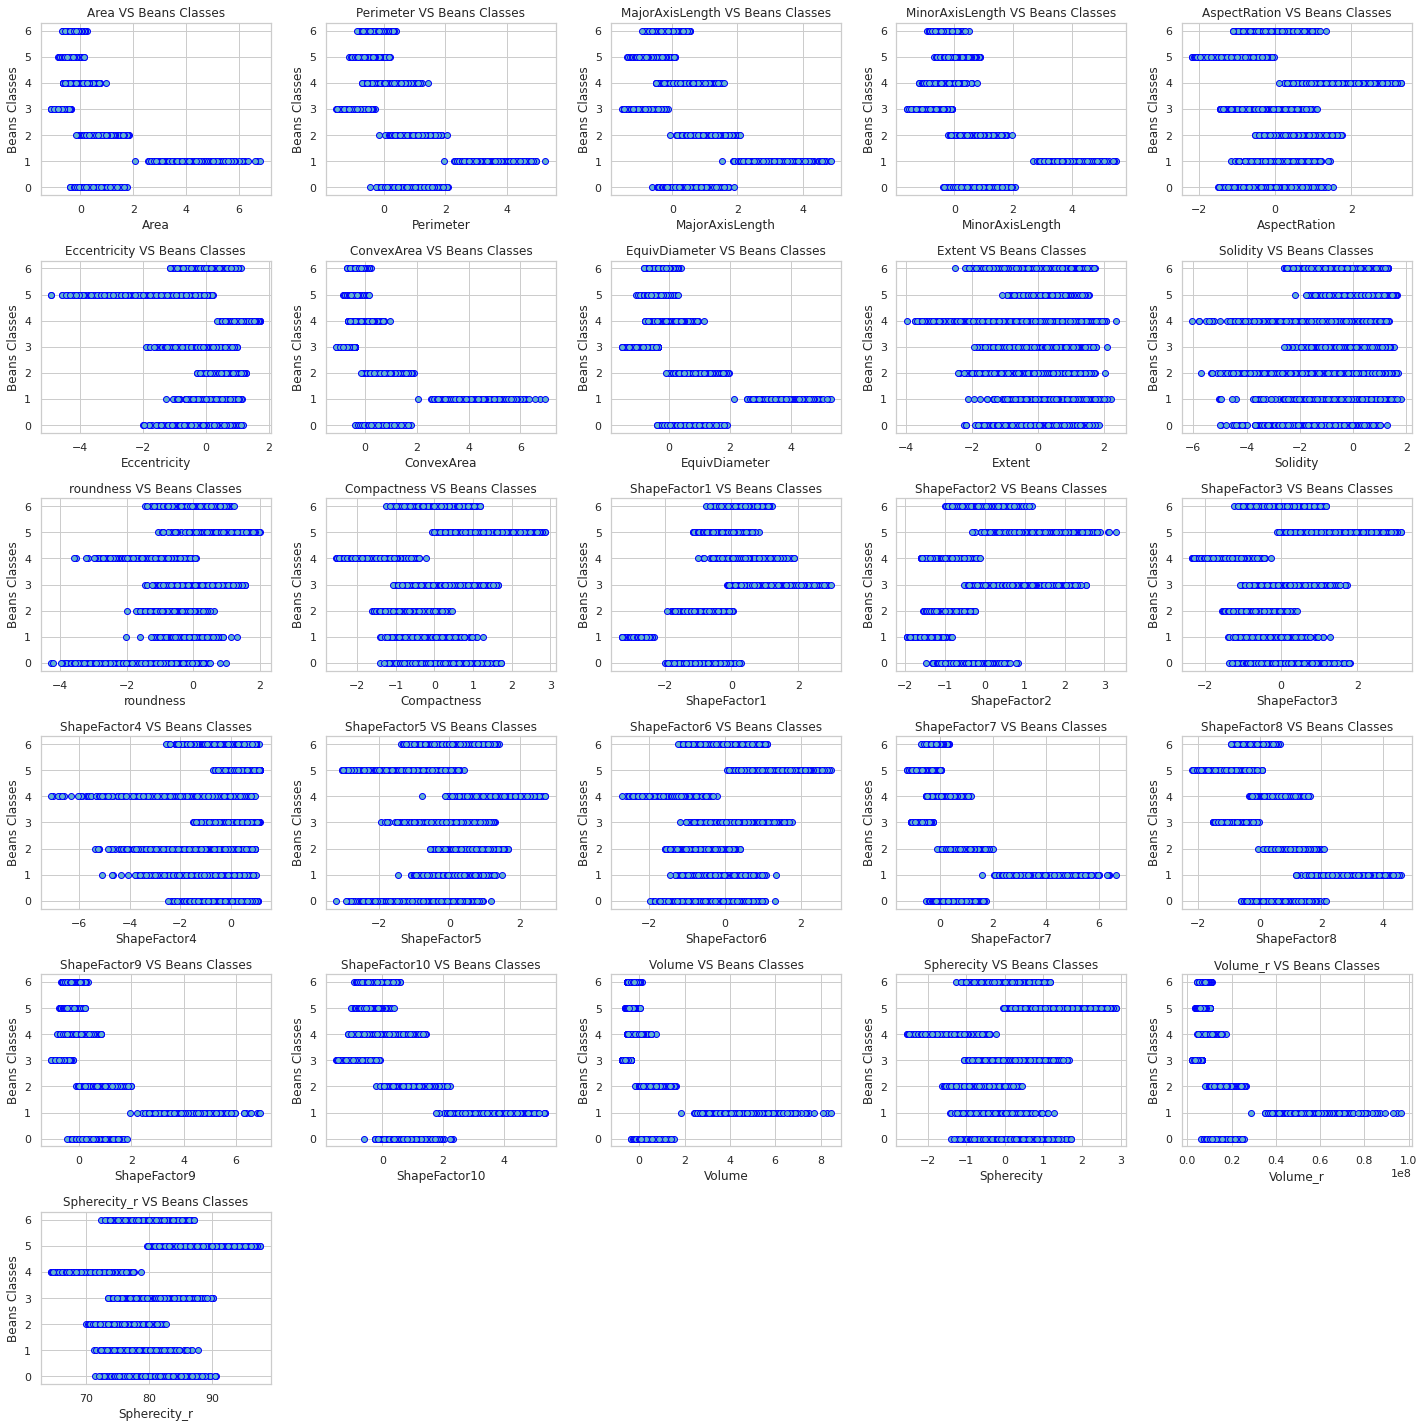

In [63]:
visualization_df=data.drop(['ID','Area_r', 'Perimeter_r', 'MajorAxisLength_r', 'MinorAxisLength_r',
       'AspectRation_r', 'Eccentricity_r', 'ConvexArea_r', 'EquivDiameter_r',
       'Extent_r', 'Solidity_r', 'roundness_r', 'Compactness_r',
       'ShapeFactor1_r', 'ShapeFactor2_r', 'ShapeFactor3_r', 'ShapeFactor4_r',
       'ShapeFactor5_r', 'ShapeFactor6_r', 'ShapeFactor7_r', 'ShapeFactor8_r',
       'ShapeFactor9_r', 'ShapeFactor10_r'], axis=1)
i = 1
plt.figure(figsize = [20, 20], tight_layout = 5)
for column in visualization_df.drop(['y'], axis=1).columns:
    plt.subplot(6, 5, i)
    plt.scatter(data = visualization_df, x = column, y = 'y', c='c', edgecolors='blue')
    plt.xlabel(column)
    plt.ylabel('Beans Classes')
    plt.title(column + ' VS ' + 'Beans Classes')
    i += 1
plt.show()

## Features-labels split and train-validation split

In [64]:
train_df, val_df = train_test_split(data, test_size=0.20, random_state=42, shuffle=True, stratify=data.y) 

x_train = train_df.drop(columns=['ID','y'])
y_train = train_df['y']

x_val = val_df.drop(columns=['ID','y'])
y_val = val_df['y']

In [65]:
x_train.shape[0], x_val.shape[0]

(8489, 2123)

In [66]:
#dropped high correlated redundant features: 'ConvexArea', 'Compactness'

model_columns = [
                  'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
                  'AspectRation', 'Eccentricity', 'roundness', 'Extent',  'ShapeFactor5',
                  'Solidity','ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4',
                  'Volume', 'Spherecity',  'ShapeFactor9',

                  ]

## Training different classification models on the dataset


###  LightGB Classifier:

In [67]:
# build the lightgbm model

lgb_model = LGBMClassifier(objective='multiclass', random_state=42, n_estimators=100, learning_rate=0.03, reg_alpha=0.00001)
lgb_model.fit(x_train[model_columns], y_train)
predictions_LGB = lgb_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_LGB, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_LGB))

Mean_F1_score 0.9265190767781442
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       208
           1       0.99      1.00      0.99        82
           2       0.96      0.95      0.96       258
           3       0.92      0.91      0.92       556
           4       0.97      0.95      0.96       287
           5       0.95      0.93      0.94       317
           6       0.84      0.90      0.87       415

    accuracy                           0.93      2123
   macro avg       0.94      0.94      0.94      2123
weighted avg       0.93      0.93      0.93      2123



###  MultiLayerPerceptronClassifier:

In [68]:
# Create an instance of the MLPclassifier

mlp_model = MLPClassifier(solver='adam', activation='logistic', alpha=1e-5, random_state=42, max_iter=500, early_stopping=True, validation_fraction=0.01, warm_start=True, verbose=False, learning_rate ='adaptive', learning_rate_init=0.001)
mlp_model = mlp_model.fit(x_train[model_columns], y_train)

predictions_MLP = mlp_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_MLP, average='micro'))
print("Classification Report")
print(classification_report(y_val, predictions_MLP))

Mean_F1_score 0.8935468676401319
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       208
           1       1.00      0.99      0.99        82
           2       0.89      0.91      0.90       258
           3       0.86      0.94      0.90       556
           4       0.94      0.95      0.94       287
           5       0.92      0.95      0.93       317
           6       0.84      0.76      0.80       415

    accuracy                           0.89      2123
   macro avg       0.92      0.90      0.91      2123
weighted avg       0.89      0.89      0.89      2123



###  KNeighborsClassifier:

In [69]:
kn_model = KNeighborsClassifier(algorithm='auto', weights ='distance', n_neighbors=10)
kn_model.fit(x_train[model_columns], y_train)
          
predictions_KN = kn_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_KN, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_KN))

Mean_F1_score 0.9255770136599152
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       208
           1       1.00      1.00      1.00        82
           2       0.95      0.97      0.96       258
           3       0.91      0.90      0.91       556
           4       0.99      0.95      0.97       287
           5       0.95      0.94      0.94       317
           6       0.84      0.89      0.86       415

    accuracy                           0.93      2123
   macro avg       0.94      0.94      0.94      2123
weighted avg       0.93      0.93      0.93      2123



###  SupportVectorClassifier:

In [70]:
svc_model = SVC(C=1.0, kernel='rbf', max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.20)
# svc_model = SVC(C=1.0, kernel='poly', degree=3, max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.20)
svc_model.fit(x_train[model_columns], y_train)

predictions_SVC = svc_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_SVC, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_SVC))

Mean_F1_score 0.93452661328309
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       208
           1       1.00      1.00      1.00        82
           2       0.95      0.97      0.96       258
           3       0.93      0.92      0.92       556
           4       0.98      0.95      0.97       287
           5       0.96      0.94      0.95       317
           6       0.85      0.90      0.88       415

    accuracy                           0.93      2123
   macro avg       0.95      0.95      0.95      2123
weighted avg       0.94      0.93      0.93      2123



###  DecisionTreeClassifier:

In [71]:
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=16, ccp_alpha=0.00001, random_state=42, criterion='gini')
dt_model.fit(x_train[model_columns], y_train)

predictions_DT = dt_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_DT, average='micro'))

print("Classification Report: \n", classification_report(y_val, predictions_DT))

Mean_F1_score 0.9006123410268488
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       208
           1       1.00      1.00      1.00        82
           2       0.89      0.93      0.91       258
           3       0.89      0.90      0.90       556
           4       0.99      0.89      0.94       287
           5       0.95      0.92      0.94       317
           6       0.80      0.87      0.83       415

    accuracy                           0.90      2123
   macro avg       0.92      0.91      0.92      2123
weighted avg       0.90      0.90      0.90      2123



#### Ensemble method:

In [72]:
#voting

classifiers = [
                ('SVC:', svc_model),
                ('MLP:', mlp_model),
                ('LGB:', lgb_model),
                ('KN:', kn_model),
                ('DT:', dt_model),
                ]
    
for clf_name, clf in classifiers:
#     clf.fit(x_train[model_columns], y_train)
    y_pred = clf.predict(x_val[model_columns])
    print(clf_name, f1_score(y_val, y_pred, average='micro'))

vc = VotingClassifier(estimators=classifiers)
kfold = StratifiedKFold(n_splits=10, random_state=42)
cv_results = cross_val_score(vc, x_train[model_columns], y_train, cv=kfold, scoring='f1_micro')
vc.fit(x_train[model_columns], y_train)
y_pred_voting = vc.predict(x_val[model_columns])
print()
print('Voting Classifier: ',f1_score(y_val, y_pred_voting, average='micro'))

SVC: 0.93452661328309
MLP: 0.8935468676401319
LGB: 0.9265190767781442
KN: 0.9255770136599152
DT: 0.9006123410268488

Voting Classifier:  0.927461139896373


## Reading the test file

In [73]:
raw_test = pd.read_csv('test.csv')
raw_test.sample(10)

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
1797,12631,25611,608.736,199.175134,165.282445,1.205059,0.558009,26203,180.579451,0.717395,0.977407,0.868517,0.906637,0.007777,0.003241,0.821990,0.990546
27,10861,38066,704.695,236.662740,205.138963,1.153670,0.498658,38393,220.152530,0.795694,0.991483,0.963263,0.930237,0.006217,0.002872,0.865342,0.998319
1794,12628,35665,689.758,252.930340,180.140326,1.404074,0.701963,35955,213.096430,0.809226,0.991934,0.942017,0.842510,0.007092,0.002204,0.709824,0.996645
2486,13320,36075,702.685,238.165995,193.080956,1.233503,0.585463,36522,214.317793,0.755814,0.987761,0.918110,0.899867,0.006602,0.002670,0.809761,0.998843
1711,12545,92325,1190.336,440.079286,274.862825,1.601087,0.780964,96424,342.858340,0.708253,0.957490,0.818823,0.779083,0.004767,0.001083,0.606970,0.971813
2006,12840,184245,1671.122,620.951540,385.137448,1.612286,0.784414,189905,484.342874,0.725508,0.970196,0.829066,0.780001,0.003370,0.000770,0.608402,0.980917
316,11150,31335,635.011,216.790092,184.163440,1.177161,0.527587,31599,199.742237,0.774277,0.991645,0.976511,0.921362,0.006918,0.003075,0.848909,0.999302
2370,13204,65144,978.923,371.295482,224.295035,1.655389,0.796918,65737,287.999856,0.762186,0.990979,0.854254,0.775662,0.005700,0.001273,0.601652,0.995968
2083,12917,50570,848.081,326.247629,198.051665,1.647285,0.794657,51069,253.747362,0.792286,0.990229,0.883544,0.777775,0.006451,0.001456,0.604934,0.996500
100,10934,75253,1126.203,392.539492,244.967498,1.602415,0.781378,76962,309.540135,0.723183,0.977794,0.745590,0.788558,0.005216,0.001244,0.621824,0.996419


In [74]:
raw_test.isnull().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

In [75]:
X_test = raw_test.copy()

X_test = prepare_data(X_test, isTest=True)

X_test = X_test.drop(columns=['ID'])

y_test_predicted_vc = vc.predict(X_test[model_columns])
y_test_predicted_vc = labelencoder.inverse_transform(y_test_predicted_vc)

raw_test['y'] = y_test_predicted_vc

raw_test

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,BOMBAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,13538,66833,1018.336,400.397077,214.346215,1.867992,0.844640,67787,291.709476,0.759604,0.985927,0.809876,0.728550,0.005991,0.001041,0.530786,0.991504,CALI
2705,13539,40572,725.331,250.714014,206.471935,1.214276,0.567264,40900,227.283688,0.767479,0.991980,0.969089,0.906546,0.006179,0.002574,0.821825,0.997923,SEKER
2706,13540,61226,1008.378,408.227467,199.385082,2.047432,0.872611,63901,279.204879,0.611648,0.958138,0.756657,0.683944,0.006668,0.000900,0.467780,0.957748,HOROZ
2707,13541,34238,698.847,255.829224,170.867099,1.497241,0.744255,34724,208.789788,0.724890,0.986004,0.880956,0.816130,0.007472,0.002045,0.666067,0.997263,DERMASON
